# DatosReto - TAGS


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
tag2024 = pd.read_excel('TAGS/Consolidado Edenred 2024.xlsx', sheet_name='Detalle de Movimientos 2024')
tag2022 = pd.read_excel('TAGS/Edenred Consolidado 2022.xlsx', sheet_name='Detalle de Movimientos por Fact')
tag2023 = pd.read_excel('TAGS/Edenred Consolidado Diciembre 2023.xlsx', sheet_name='Detalle de Movimientos ')
tag2021 = pd.read_excel('TAGS/Edenred Fuel Consumption Consolidation 2021.xlsx', sheet_name='Detalle de Movimientos por Fact')

c:\Users\jesus\anaconda3\envs\tf\lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell AY8442 is marked as a date but the serial value 3655679 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
c:\Users\jesus\anaconda3\envs\tf\lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell AZ8442 is marked as a date but the serial value 3611236 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
c:\Users\jesus\anaconda3\envs\tf\lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell AY8443 is marked as a date but the serial value 3655679 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
c:\Users\jesus\anaconda3\envs\tf\lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell AZ8443 is marked as a date but the serial value 3611236 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
c:\Users\jesus\anaconda3\env

In [46]:
tag = pd.concat([tag2021, tag2022, tag2023, tag2024], ignore_index=True)

In [47]:
# check Common columns across all years
common_columns = set(tag2021.columns).intersection(tag2022.columns).intersection(tag2023.columns).intersection(tag2024.columns)
print(f'Columnas comunes: {common_columns}')
len(common_columns)
tag = tag[common_columns]

Columnas comunes: {'TON C02', 'Num Serie', 'Observación', 'IVA', 'Número de Control', 'Respuesta', 'Placa', 'Hora Transacción', 'Cantidad Mercancía', 'Id Conductor', 'Folio', 'RFC', 'Fecha Transacción', 'IEPS', 'Importe Transacción', 'Rendimiento Real', 'BL', 'Cliente', 'Factura', 'KG C02', 'Num Tarjeta', 'Precio Unitario', 'Division', 'Razón Social Afiliado', 'Comision', 'Recorrido', 'Mercancía', 'Km Transacción', 'Km Ant Transacción', 'Identificador Vehículo', 'IVA %', 'Id Mercancía', 'Rendimiento', 'Arboles', 'Id Grupo Región', 'No Comprobante', 'Id Región', 'Serie', 'Conductor', 'No Estación Pemex', 'Month', 'Importe Neto', 'Subtotal', 'Vehículo'}


C:\Users\jesus\AppData\Local\Temp\ipykernel_4364\2795700676.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  tag = tag[common_columns]


In [48]:
# # Tamaño del dataset
print(f'Tamaño del dataset: {tag.shape[0]} filas y {tag.shape[1]} columnas')

Tamaño del dataset: 48769 filas y 44 columnas


46

In [49]:
# Check for missing columns in each dataframe
missing_columns_2021 = set(tag2021.columns) - common_columns
missing_columns_2022 = set(tag2022.columns) - common_columns
missing_columns_2023 = set(tag2023.columns) - common_columns
missing_columns_2024 = set(tag2024.columns) - common_columns
print("\nMissing columns in 2021 dataframe:")
print(missing_columns_2021)
print("\nMissing columns in 2022 dataframe:")
print(missing_columns_2022)
print("\nMissing columns in 2023 dataframe:")
print(missing_columns_2023)
print("\nMissing columns in 2024 dataframe:")
print(missing_columns_2024)


Missing columns in 2021 dataframe:
{'Sub BL', 'Locacion', 'No. Economico', 'AC', 'Old BL', 'AU', 'VALID', 'Estado de Carga', 'CONCATENATE', 'Serie.1'}

Missing columns in 2022 dataframe:
{'GR', 'Estado', 'BL 2 ', 'CC', 'SUB BL', 'VIN Number', 'No Economico', 'Grupo de Región ', 'PO'}

Missing columns in 2023 dataframe:
{'GR', 'Estado', 'CC', 'BL2', 'VIN NUMBER', 'SUB BL', 'No Economico', 'Grupo de Región ', 'PO'}

Missing columns in 2024 dataframe:
{'GR', 'Importe Transacción.1', 'CC', 'BL2', 'VIN NUMBER', 'SUB BL', 'Unnamed: 53', 'No Economico', 'Grupo de Región ', 'PO'}


Id grupo region no hace mucho sentido

VALID parece que es un booleano pero not sure

Checar que Id mercancia tiene cada tipo de Mercancia, podemos eliminar una columna de esas

Columnas de informacion financiera (IVA, IEPS, Comision, Subtotal, no las agrego por que al final de cuenta son formulas y estan muy correlacionadas con el subtotal, no le daria informacion nueva)

Importe neto ya incluye el IEPS. Importe transaccion es el importe neto mas el iva

Subtotal es el importe neto + comision

Valuable = 'Id Mercancía', 'Mercancía', 'Km Ant Transacción', 'Km Transacción', 'Recorrido'

## Todas las columnas

Corregir algunos tipos e inconcistencias en los datos

In [50]:
# Corregir los valores que no están en el formato abreviado de mes
# Crear un diccionario para mapear los nombres de meses en diferentes formatos al formato abreviado en inglés
month_mapping = {
    'ene.': 'Jan', 'feb.': 'Feb', 'mar.': 'Mar', 'abr.': 'Apr', 'may.': 'May', 'jun.': 'Jun',
    'jul.': 'Jul', 'ago.': 'Aug', 'sep.': 'Sep', 'oct.': 'Oct', 'nov.': 'Nov', 'dic.': 'Dec', 'Abr': 'Apr',
    'Jan': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Apr': 'Apr', 'May': 'May', 'Jun': 'Jun',
    'Jul': 'Jul', 'Aug': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dec': 'Dec'
}

# Corregir los valores de la columna 'Month' utilizando el mapeo
tag['Month'] = tag['Month'].apply(lambda x: month_mapping.get(x, pd.to_datetime(x, errors='coerce').strftime('%b') if pd.notnull(pd.to_datetime(x, errors='coerce')) else None))
tag['Month'] = tag['Month'].apply(lambda x: month_mapping.get(x, pd.to_datetime(x, errors='coerce').strftime('%b') if pd.notnull(pd.to_datetime(x, errors='coerce')) else None))

In [51]:
tag['Fecha Transacción'] = pd.to_datetime(tag['Fecha Transacción'], format='%d/%m/%Y', errors='coerce')
# Convertir la columna 'Hora Transacción' al formato datetime.time
tag['Hora Transacción'] = pd.to_datetime(tag['Hora Transacción'], format='%H:%M:%S', errors='coerce').dt.time

Tipo, cantidad de valores unicos y valores nulos

In [52]:
for col in tag.columns:
    print(f"Columna: {col}")
    print(f"Tipo de dato: {tag[col].dtype}")
    print(f"Valores únicos: {tag[col].unique()[:10]}")
    print(f"Cantidad de valores únicos: {tag[col].nunique()}")
    print(f"Valores nulos: {tag[col].isnull().sum()}, {tag[col].isnull().sum()/len(tag)*100:.2f}%")
    print("-" * 50)

Columna: TON C02
Tipo de dato: float64
Valores únicos: [0.18065502 0.19368    0.1861749  0.181575   0.07263    0.09105381
 0.1295235  0.06410808 0.1922274  0.09684   ]
Cantidad de valores únicos: 21713
Valores nulos: 82, 0.17%
--------------------------------------------------
Columna: Num Serie
Tipo de dato: object
Valores únicos: ['NA637502394399254488' '637477018167824188' 'NA637480531575990152'
 '637477018167824194' '637477018167824204' '637477018167824540'
 '637477018167824224' '637477018167824072' '637477018167824498'
 '637477018167824534']
Cantidad de valores únicos: 1189
Valores nulos: 0, 0.00%
--------------------------------------------------
Columna: Observación
Tipo de dato: object
Valores únicos: [nan 'RD' 'R' 'D' 'KR' 'KRD' 2597672 3611447 3527291 3522355]
Cantidad de valores únicos: 23
Valores nulos: 4621, 9.48%
--------------------------------------------------
Columna: IVA
Tipo de dato: float64
Valores únicos: [202.22 200.16 202.02 197.55  77.13  94.36 134.61  67.34 20

**NOTA** = Hora transaccion seria cualitativa o cuantitativa? segun yo es cualitativa

In [53]:
cualitativas = ['Num Serie', 'Observación', 'Número de Control',
       'Respuesta', 'Placa', 'Hora Transacción',
       'Id Conductor', 'Folio', 'RFC', 'Fecha Transacción',
       'BL', 'Cliente', 'Factura',
       'Num Tarjeta', 'Division',
       'Razón Social Afiliado', 'Mercancía',
       'Identificador Vehículo',
        'Id Mercancía', 'Id Grupo Región',
       'No Comprobante', 'Id Región', 'Serie', 'Conductor',
       'No Estación Pemex', 'Month', 'Vehículo']

cuantitativas = ['TON C02', 'IVA',
       'Cantidad Mercancía',
       'IEPS',
       'Importe Transacción', 'Rendimiento Real',
       'KG C02', 'Precio Unitario',
       'Comision', 'Recorrido', 
       'Km Transacción', 'Km Ant Transacción',
       'IVA %', 'Rendimiento', 'Arboles',
       'Importe Neto', 'Subtotal']

Variables cuantitativas

In [54]:
#Medidas de tendencial central, promedio, media, mediana y moda. Maximo, minimo, varianza y desviacion estandar
for col in cuantitativas:
    if tag[col].dtype in ['int64', 'float64']:
        print(f"Columna: {col}")
        print(f"Promedio: {tag[col].mean()}")
        print(f"Media: {tag[col].median()}")
        print(f"Moda: {tag[col].mode()[0]}")
        print(f"Máximo: {tag[col].max()}")
        print(f"Mínimo: {tag[col].min()}")
        print(f"Varianza: {tag[col].var()}")
        print(f"Desviación estándar: {tag[col].std()}")
        print("-" * 50)

Columna: TON C02
Promedio: 0.22114817101403222
Media: 0.15736499999999998
Moda: 0.19368
Máximo: 2.421
Mínimo: 0.0
Varianza: 0.062445556169490275
Desviación estándar: 0.24989108861560125
--------------------------------------------------
Columna: IVA
Promedio: 268.81436970876683
Media: 181.02
Moda: 204.56
Máximo: 3297.1295999999998
Mínimo: 3.1232
Varianza: 107355.32683567931
Desviación estándar: 327.6512274289222
--------------------------------------------------
Columna: Cantidad Mercancía
Promedio: 92.52262020198069
Media: 65.61428954423593
Moda: 80.0
Máximo: 1000.0
Mínimo: 1.0
Varianza: 10707.681296869067
Desviación estándar: 103.4779266165933
--------------------------------------------------
Columna: IEPS
Promedio: 42.593831329435694
Media: 32.06
Moda: 36.11
Máximo: 449.16435252
Mínimo: 0.4
Varianza: 1780.674933289478
Desviación estándar: 42.19804418796537
--------------------------------------------------
Columna: Importe Transacción
Promedio: 2058.0466181309775
Media: 1403.35
Mod

Cualitativas

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
len (cualitativas)

27

In [57]:
# Transformar las columnas cualitativas a tipo object
for col in cualitativas:
    tag[col] = tag[col].astype(str)
    # tag[col] = le.fit_transform(tag[col])
    print(f"Columna: {col}")
    print(f"Valores únicos: {tag[col].unique()}")
    most_frequent = tag[col].mode()[0]
    print(f"Valor más frecuente: {most_frequent}")
    print("-" * 50)

Columna: Num Serie
Valores únicos: ['NA637502394399254488' '637477018167824188' 'NA637480531575990152' ...
 'NA638705648196809028' 'NA638705647546150902' 'NA638708303910898884']
Valor más frecuente: 637477018167824194
--------------------------------------------------
Columna: Observación
Valores únicos: ['nan' 'RD' 'R' 'D' 'KR' 'KRD' '2597672' '3611447' '3527291' '3522355'
 '3524566' '3523608' '3533787' '3531993' '3573227' '3572763' '3575204'
 '3569032' '3569421' '3571351' '3613896' '3621709' '3618416' '3613780']
Valor más frecuente: R
--------------------------------------------------
Columna: Número de Control
Valores únicos: ['1880912' '1880910' '1880909' '1880911' '1880908' '1888072' '1859088'
 '1859816' '1859815' '1859817' '1916303' '1916305' '1916304' '1916302'
 '1916306' '1923811' '1947771' '1947773' '1947775' '1947774' '1947772'
 '1955717' '1955005' '1955718' '1955719' '1978122' '1978120' '1978123'
 '1978124' '1978121' '1986127' '2009452' '2009450' '2009451' '2009449'
 '200944

## Columnas a conservar para el objetivo

In [59]:
# Definir las columnas que se desean conservar
columnsToKeep = [
       'Month', 'Id Región',
       'Division', 'BL', 'Identificador Vehículo', 'Vehículo', 'Placa', 
       'Num Tarjeta', 'Num Serie', 'Fecha Transacción', 'Hora Transacción', 
       'Id Mercancía', 'Mercancía', 'Km Ant Transacción', 
       'Km Transacción', 'Recorrido',
       'Importe Transacción', 'Cantidad Mercancía', 
       'KG C02', 'Arboles', 'Precio Unitario', 'Rendimiento', 
       'Rendimiento Real', 'Id Conductor',
       'Observación', 'Respuesta'
]

In [ ]:
cualitativas = ['Num Serie', 'Observación', 'Número de Control',
       'Respuesta', 'Placa', 'Hora Transacción',
       'Id Conductor', 'Folio', 'RFC', 'Fecha Transacción',
       'BL', 'Cliente', 'Factura',
       'Num Tarjeta', 'Division',
       'Razón Social Afiliado', 'Mercancía',
       'Identificador Vehículo',
        'Id Mercancía', 'Id Grupo Región',
       'No Comprobante', 'Id Región', 'Serie', 'Conductor',
       'No Estación Pemex', 'Month', 'Vehículo']

cuantitativas = ['TON C02', 'IVA',
       'Cantidad Mercancía',
       'IEPS',
       'Importe Transacción', 'Rendimiento Real',
       'KG C02', 'Precio Unitario',
       'Comision', 'Recorrido', 
       'Km Transacción', 'Km Ant Transacción',
       'IVA %', 'Rendimiento', 'Arboles',
       'Importe Neto', 'Subtotal']

In [60]:
cualitativas_columnsToKeep = [col for col in columnsToKeep if col in cualitativas]
cuantitativas_columnsToKeep = [col for col in columnsToKeep if col in cuantitativas]

In [61]:
cuantitativas_columnsToKeep

['Km Ant Transacción',
 'Km Transacción',
 'Recorrido',
 'Importe Transacción',
 'Cantidad Mercancía',
 'KG C02',
 'Arboles',
 'Precio Unitario',
 'Rendimiento',
 'Rendimiento Real']

In [62]:
cualitativas_columnsToKeep

['Month',
 'Id Región',
 'Division',
 'BL',
 'Identificador Vehículo',
 'Vehículo',
 'Placa',
 'Num Tarjeta',
 'Num Serie',
 'Fecha Transacción',
 'Hora Transacción',
 'Id Mercancía',
 'Mercancía',
 'Id Conductor',
 'Observación',
 'Respuesta']

In [63]:
len(columnsToKeep)

26

In [64]:
tag = tag[columnsToKeep]

In [134]:
tag_copy = tag.copy()

In [140]:
tag = tag_copy.copy()

In [65]:
for col in tag.columns:
    print(f"Columna: {col}")
    print(f"Tipo de dato: {tag[col].dtype}")
    print(f"Valores únicos: {tag[col].unique()[:10]}")
    print(f"Cantidad de valores únicos: {tag[col].nunique()}")
    print(f"Valores nulos: {tag[col].isnull().sum()}, {tag[col].isnull().sum()/len(tag)*100:.2f}%")
    print("-" * 50)

Columna: Month
Tipo de dato: object
Valores únicos: ['Feb' 'Jan' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct']
Cantidad de valores únicos: 12
Valores nulos: 0, 0.00%
--------------------------------------------------
Columna: Id Región
Tipo de dato: object
Valores únicos: ['1004' '1002' 'tengo ' '1001' '1003' '1000' 'OFS' 'SMITH' 'WIS' 'REW']
Cantidad de valores únicos: 38
Valores nulos: 0, 0.00%
--------------------------------------------------
Columna: Division
Tipo de dato: object
Valores únicos: ['WEC' 'PRS' 'MSP' 'RPF' 'DAI' 'SBS']
Cantidad de valores únicos: 6
Valores nulos: 0, 0.00%
--------------------------------------------------
Columna: BL
Tipo de dato: object
Valores únicos: ['WCE' 'SFP' 'WCF' 'WPRS' 'HSE' 'RPI' 'WCD' 'WCM' 'RPS' 'IGWC']
Cantidad de valores únicos: 20
Valores nulos: 0, 0.00%
--------------------------------------------------
Columna: Identificador Vehículo
Tipo de dato: object
Valores únicos: ['1CM3EKF41710' '1EB5JKE74032' '3G67KEE38116' '1EB9JFA48661'

Variables cuatitativas

In [66]:
#Medidas de tendencial central, promedio, media, mediana y moda. Maximo, minimo, varianza y desviacion estandar
for col in cuantitativas_columnsToKeep:
    if tag[col].dtype in ['int64', 'float64']:
        print(f"Columna: {col}")
        print(f"Promedio: {tag[col].mean()}")
        print(f"Media: {tag[col].median()}")
        print(f"Moda: {tag[col].mode()[0]}")
        print(f"Máximo: {tag[col].max()}")
        print(f"Mínimo: {tag[col].min()}")
        print(f"Varianza: {tag[col].var()}")
        print(f"Desviación estándar: {tag[col].std()}")
        print("-" * 50)

Columna: Km Ant Transacción
Promedio: 142238.3317513937
Media: 86775.0
Moda: 0.0
Máximo: 9850034.0
Mínimo: 0.0
Varianza: 202400876651.23447
Desviación estándar: 449889.84946454887
--------------------------------------------------
Columna: Km Transacción
Promedio: 144131.33716113685
Media: 86960.5
Moda: 0.0
Máximo: 9850034.0
Mínimo: 0.0
Varianza: 209888332852.98373
Desviación estándar: 458135.714448223
--------------------------------------------------
Columna: Recorrido
Promedio: 2548.682141302771
Media: 285.0
Moda: 0.0
Máximo: 9751982.0
Mínimo: -9750948.0
Varianza: 37023480132.21052
Desviación estándar: 192414.8646342338
--------------------------------------------------
Columna: Importe Transacción
Promedio: 2058.0466181309775
Media: 1403.35
Moda: 1519.2
Máximo: 24344.09
Mínimo: 23.19
Varianza: 5959850.783870827
Desviación estándar: 2441.2805623014383
--------------------------------------------------
Columna: Cantidad Mercancía
Promedio: 92.52262020198069
Media: 65.61428954423593
M

Cualitativas

In [70]:
# Transformar las columnas cualitativas a tipo object
for col in cualitativas_columnsToKeep:
    tag[col] = tag[col].astype(str)
    # tag[col] = le.fit_transform(tag[col])
    print(f"Columna: {col}")
    print(f"Valores únicos: {tag[col].unique()[:10]}")
    print(f"Cantidad de valores únicos: {tag[col].nunique()}")
    most_frequent = tag[col].mode()[0]
    print(f"Valor más frecuente: {most_frequent}")
    print("-" * 50)

Columna: Month
Valores únicos: ['Feb' 'Jan' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct']
Cantidad de valores únicos: 12
Valor más frecuente: Aug
--------------------------------------------------
Columna: Id Región
Valores únicos: ['1004' '1002' 'tengo ' '1001' '1003' '1000' 'OFS' 'SMITH' 'WIS' 'REW']
Cantidad de valores únicos: 38
Valor más frecuente: 1003
--------------------------------------------------
Columna: Division
Valores únicos: ['WEC' 'PRS' 'MSP' 'RPF' 'DAI' 'SBS']
Cantidad de valores únicos: 6
Valor más frecuente: RPF
--------------------------------------------------
Columna: BL
Valores únicos: ['WCE' 'SFP' 'WCF' 'WPRS' 'HSE' 'RPI' 'WCD' 'WCM' 'RPS' 'IGWC']
Cantidad de valores únicos: 20
Valor más frecuente: RPI
--------------------------------------------------
Columna: Identificador Vehículo
Valores únicos: ['1CM3EKF41710' '1EB5JKE74032' '3G67KEE38116' '1EB9JFA48661'
 '1EF2EKD19348' '6A76H1C07201' '2CM2HKA24475' '1CM2DKF89244'
 '6A71J1C54318' '6A75J1C82381']
Cantid

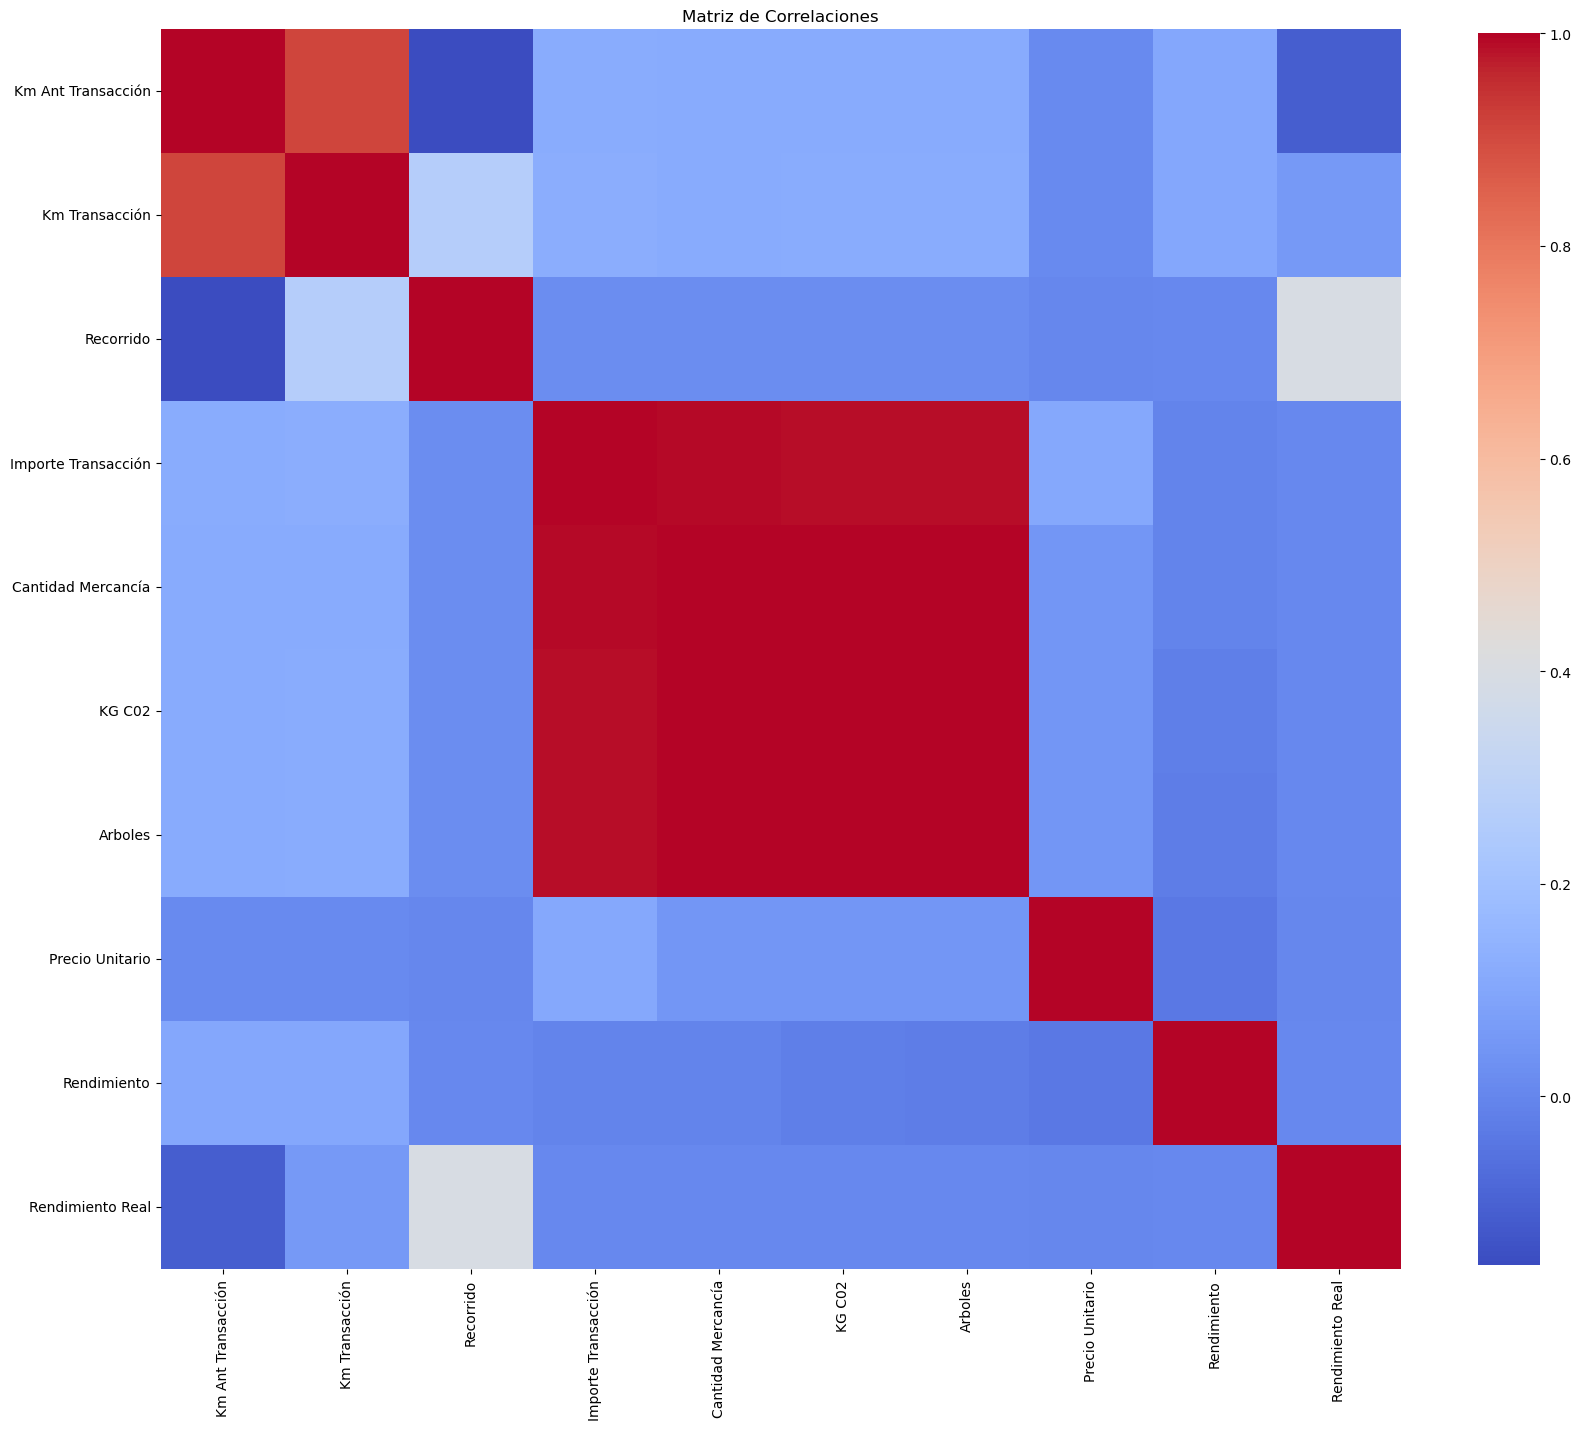

In [83]:
# Matriz de correlaciones
plt.figure(figsize=(20, 20))
sns.heatmap(tag[cuantitativas_columnsToKeep].corr(), annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlaciones')
plt.savefig('TAGS/Correlaciones.png', dpi=300, bbox_inches='tight')
plt.show()


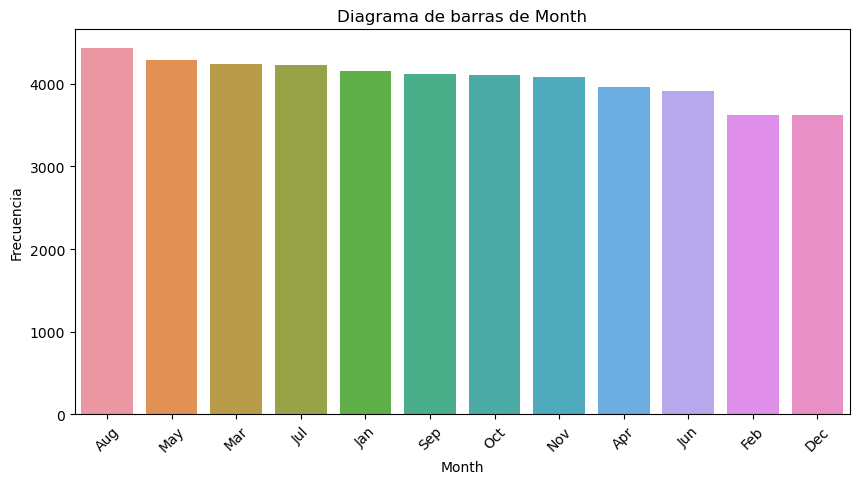

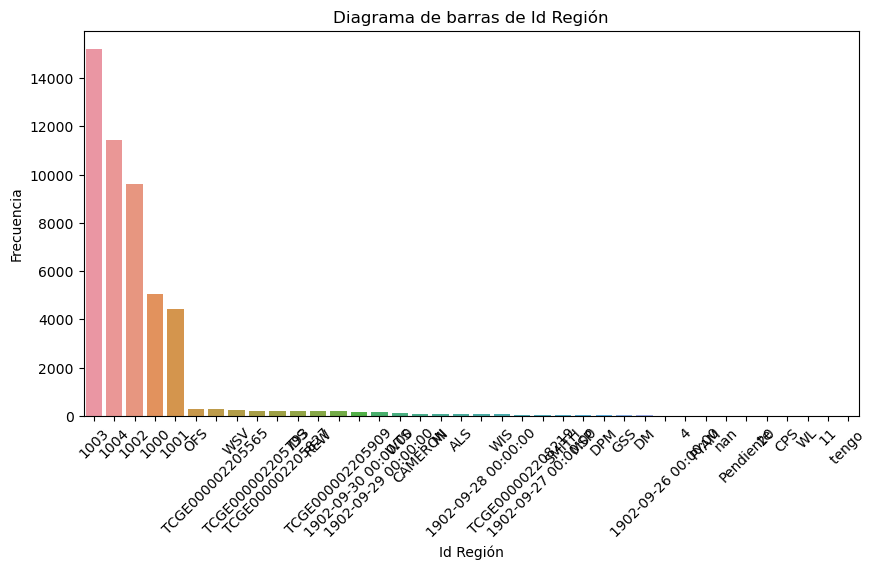

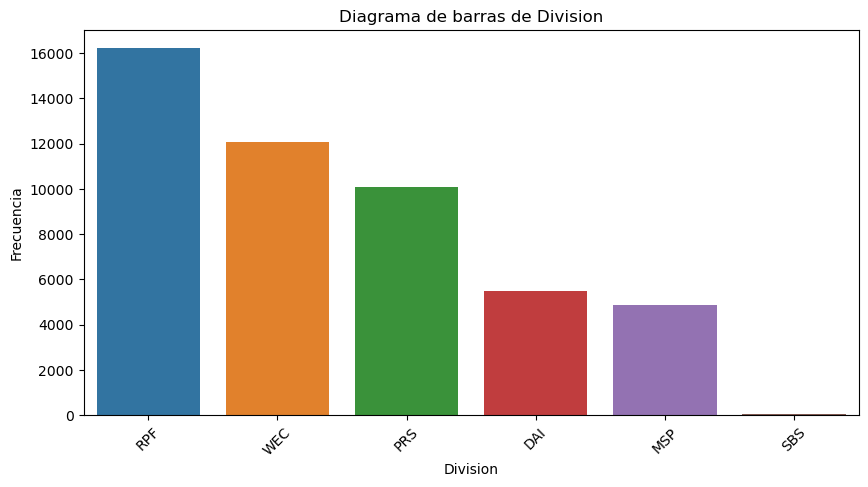

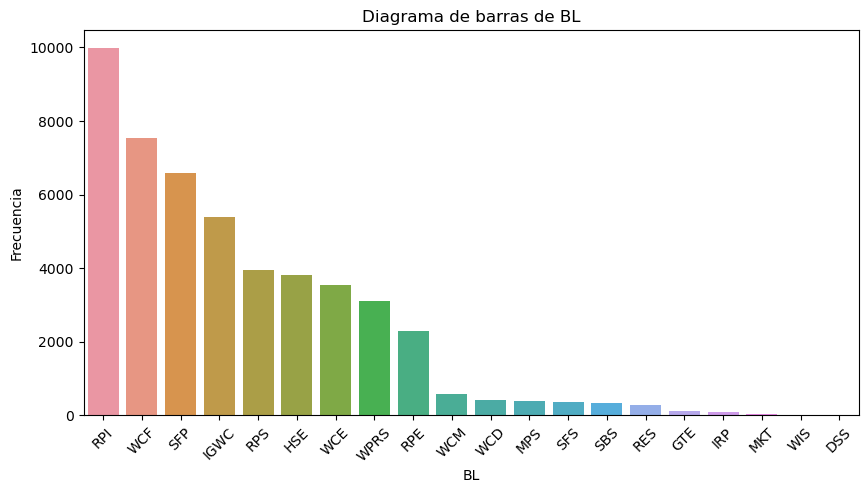

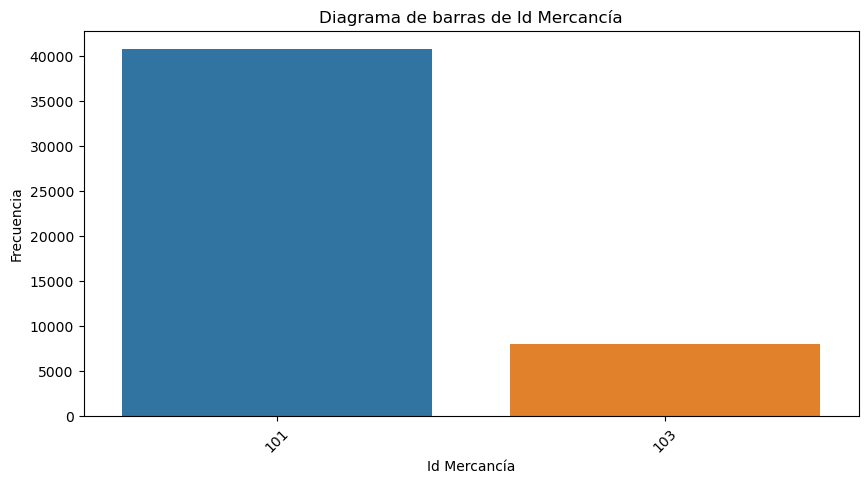

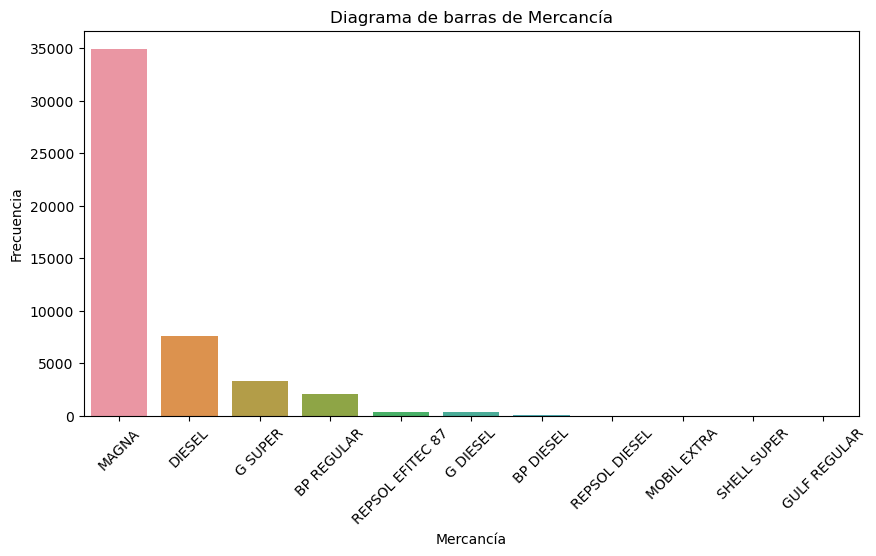

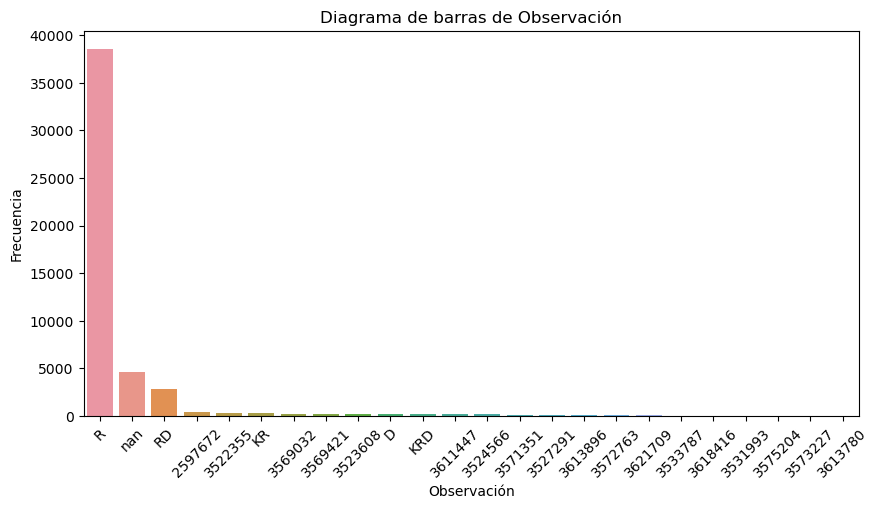

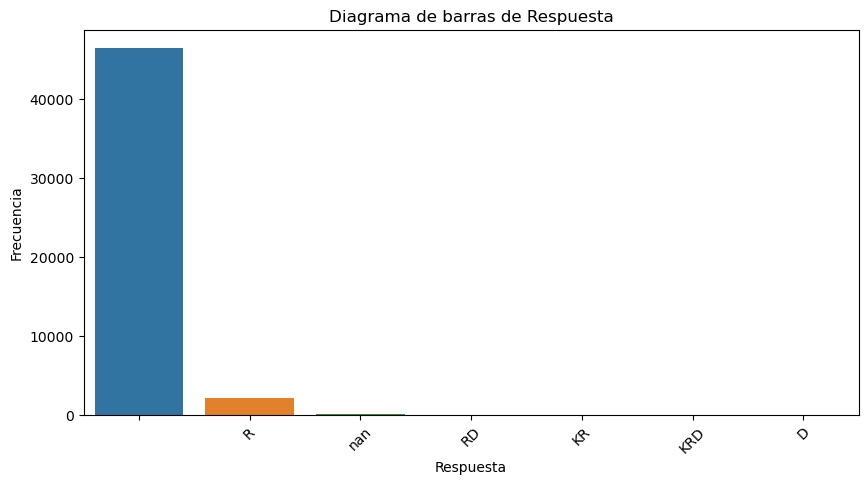

In [82]:
for column in cualitativas_columnsToKeep:
    # Skip if the column has more than 100 unique values
    if tag[column].nunique() > 100:
        continue
    plt.figure(figsize=(10, 5))
    sns.countplot(data=tag, x=column, order=tag[column].value_counts().index)
    plt.title(f"Diagrama de barras de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.savefig(f"diagrama_barras_{column}.png", dpi=300, bbox_inches='tight')  # Save before showing
    plt.show()

In [85]:
cuantitativas_columnsToKeep

['Km Ant Transacción',
 'Km Transacción',
 'Recorrido',
 'Importe Transacción',
 'Cantidad Mercancía',
 'KG C02',
 'Arboles',
 'Precio Unitario',
 'Rendimiento',
 'Rendimiento Real']

<Figure size 2000x2000 with 0 Axes>

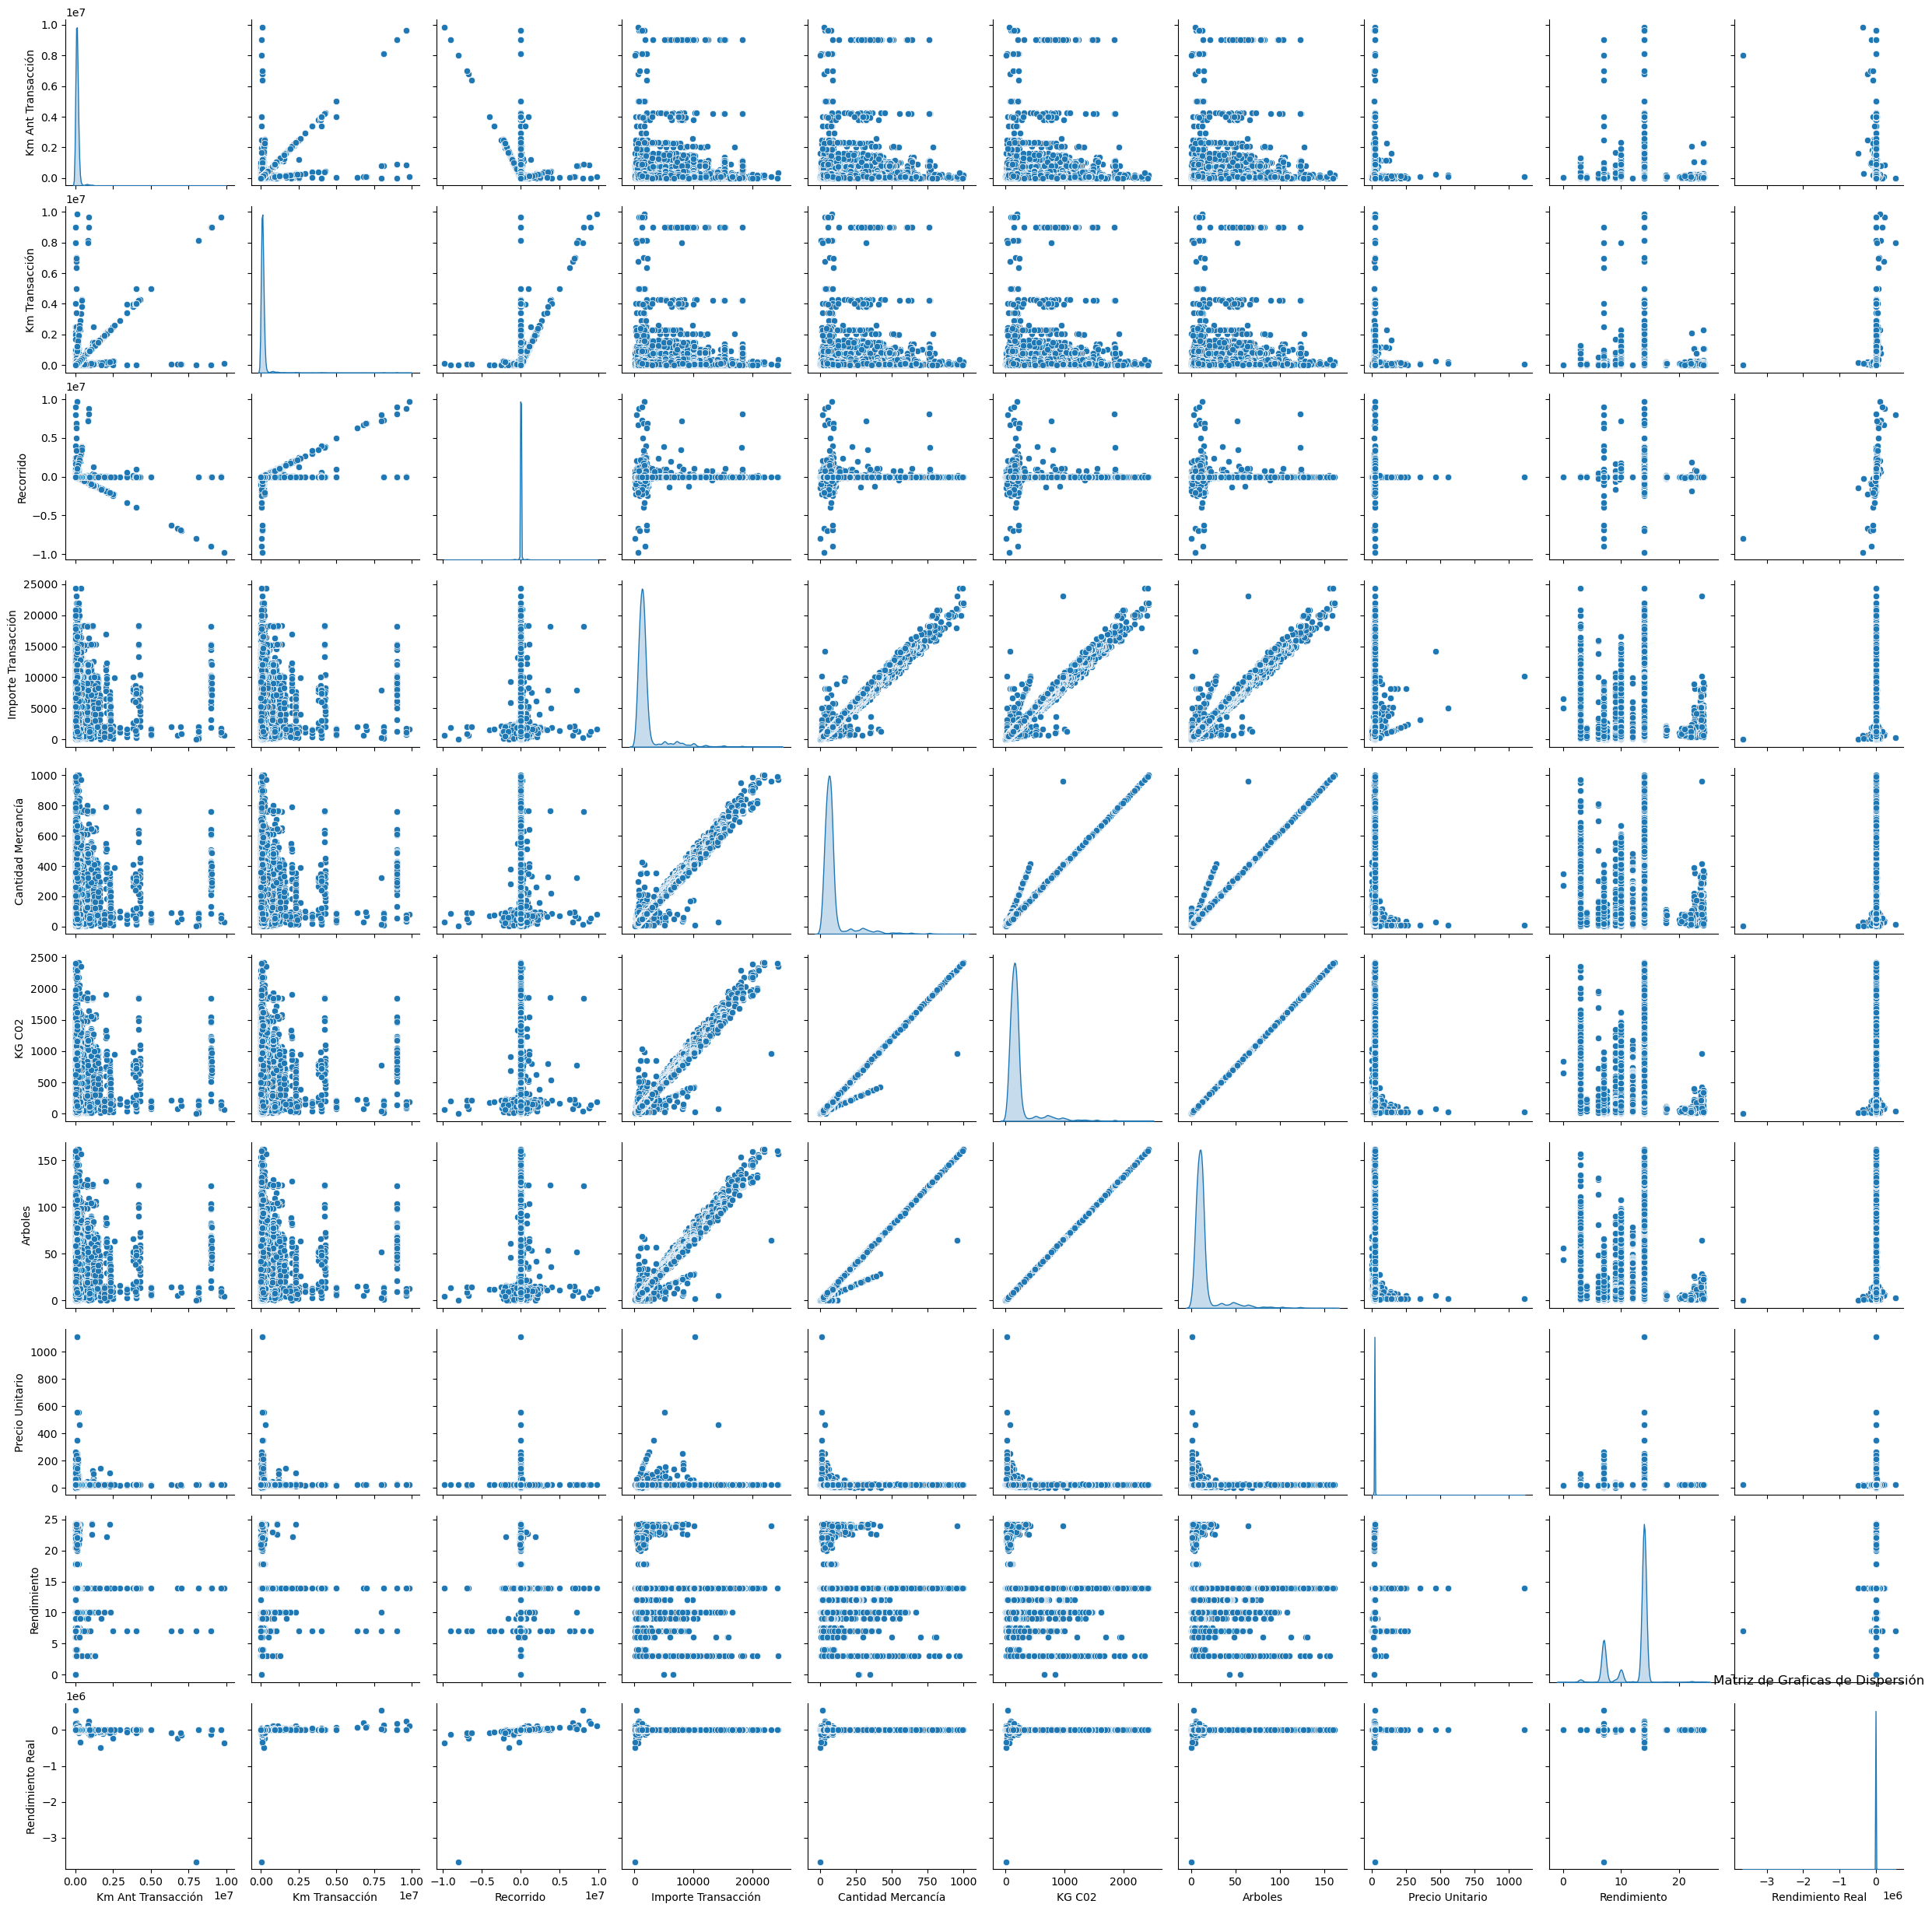

In [88]:
# Matriz de graficas de dispersion
plt.figure(figsize=(20, 20))
sns.pairplot(tag[cuantitativas_columnsToKeep], diag_kind='kde')
plt.title('Matriz de Graficas de Dispersión')
plt.savefig('TAGS/Matriz de Graficas de Dispersión.png', dpi=300, bbox_inches='tight')
plt.show()

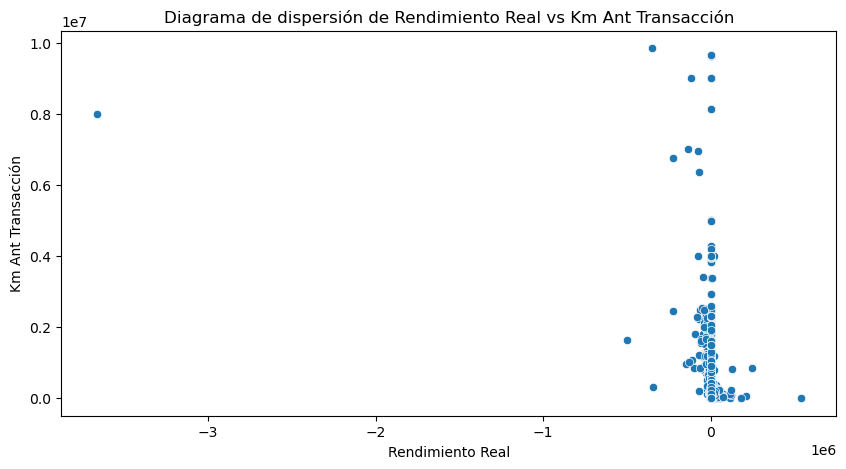

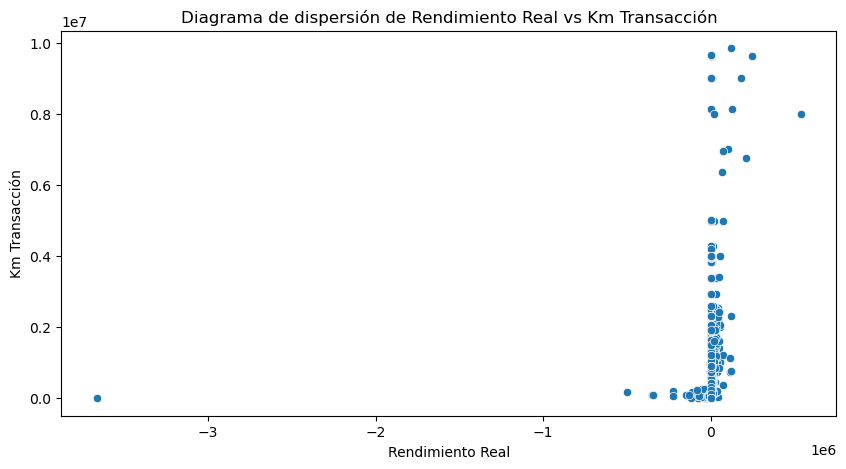

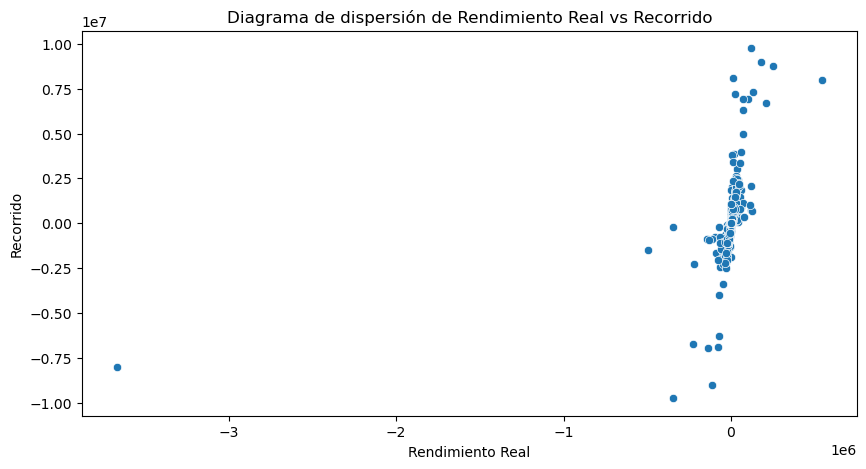

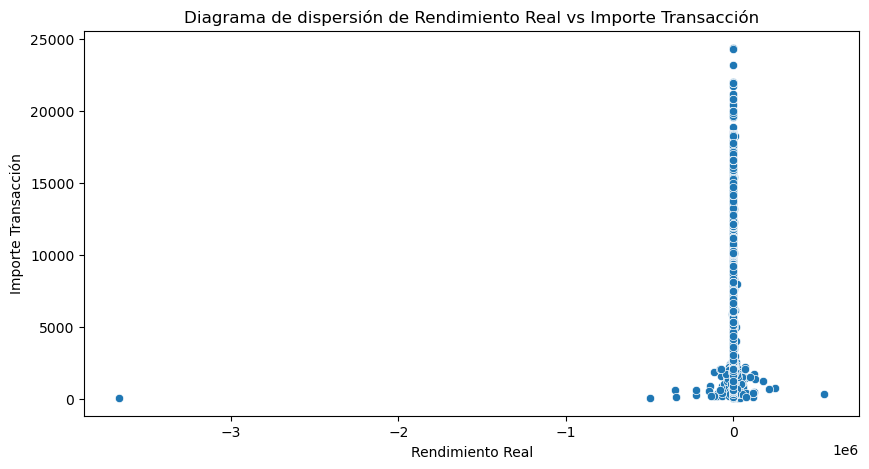

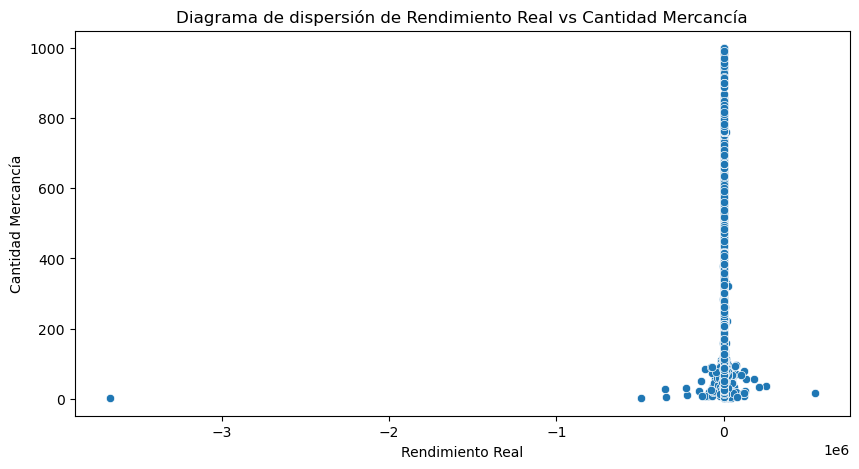

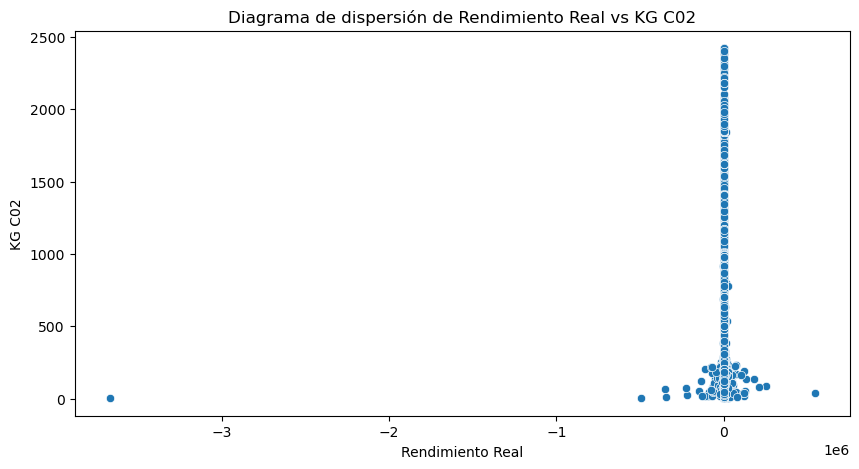

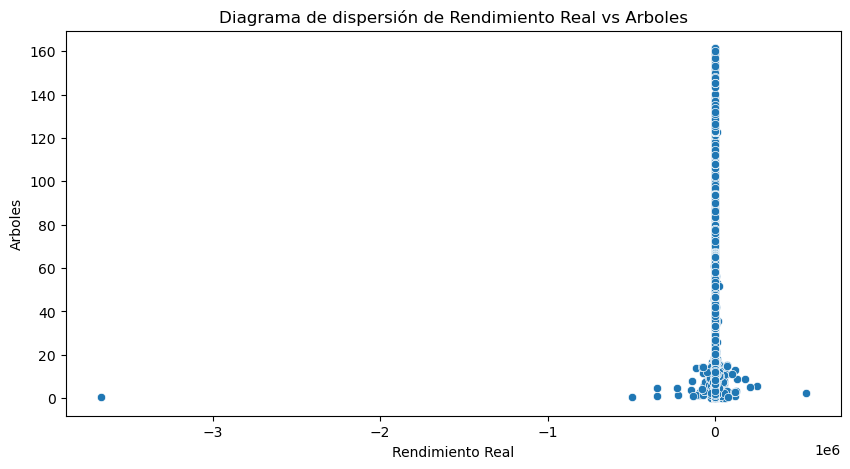

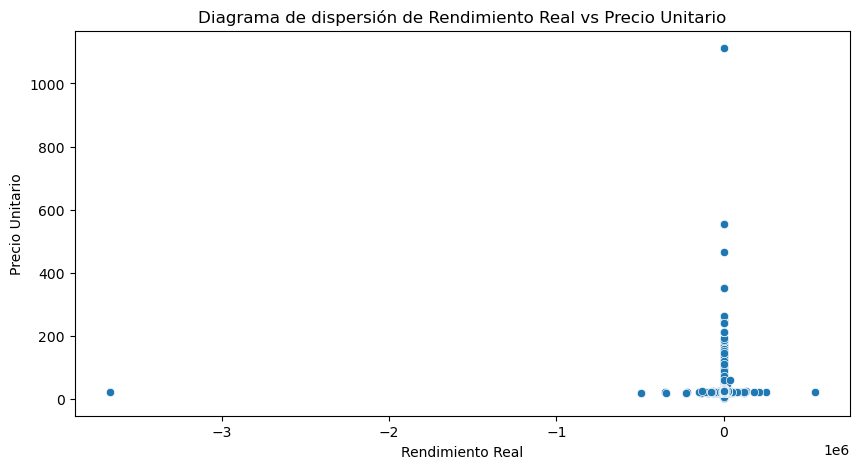

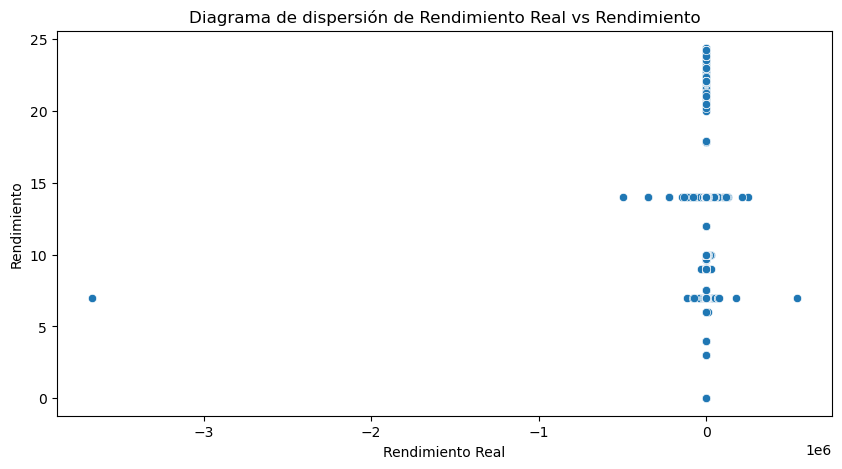

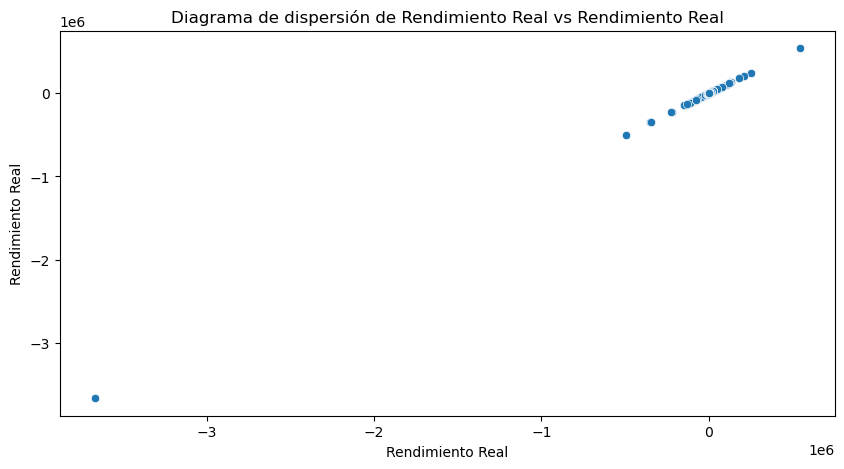

In [86]:
# Graficos de dispersion de las variables cuantitativas
for col in cuantitativas_columnsToKeep:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=tag, x='Rendimiento Real', y=col)
    plt.title(f"Diagrama de dispersión de Rendimiento Real vs {col}")
    plt.xlabel('Rendimiento Real')
    plt.ylabel(col)
    plt.show()
    # plt.savefig(f"diagrama_dispersion_{col}.png")

In [36]:
# Columnas con baja varianza
low_variance_cols = tag.columns[tag.nunique() < 2]
print("Columnas con baja varianza:")
print(low_variance_cols.tolist())

# Columnas con alta correlacion
high_correlation_cols = tag.corr().abs().unstack().sort_values(ascending=False)
high_correlation_cols = high_correlation_cols[high_correlation_cols > 0.8]
high_correlation_cols = high_correlation_cols[high_correlation_cols < 1]  # Exclude self-correlation
print("Columnas con alta correlación (mayor a 0.8):")
print(high_correlation_cols.index.tolist())

Columnas con baja varianza:
[]
Columnas con alta correlación (mayor a 0.8):
[('Arboles', 'KG C02'), ('KG C02', 'Arboles'), ('KG C02', 'Cantidad Mercancía'), ('Cantidad Mercancía', 'KG C02'), ('Cantidad Mercancía', 'Arboles'), ('Arboles', 'Cantidad Mercancía'), ('Importe Transacción', 'Cantidad Mercancía'), ('Cantidad Mercancía', 'Importe Transacción'), ('KG C02', 'Importe Transacción'), ('Importe Transacción', 'KG C02'), ('Arboles', 'Importe Transacción'), ('Importe Transacción', 'Arboles'), ('Km Ant Transacción', 'Km Transacción'), ('Km Transacción', 'Km Ant Transacción')]


C:\Users\jesus\AppData\Local\Temp\ipykernel_15608\1289734431.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_correlation_cols = tag.corr().abs().unstack().sort_values(ascending=False)
